In [1]:
import time
import json
import urllib
import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [105]:
dfab = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/ffinalafreecatv.csv')
dfab
i = dfab[dfab['week_num']>122].index
dfa=dfab.drop(i)
dfa

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,broad_rank,name,broad_share,index_num,week_num
600,600,600,0,1,LOL,37.5%,600,122
601,601,601,1,2,배틀그라운드,11.1%,601,122
602,602,602,2,3,스타,10.8%,602,122
603,603,603,3,4,서든어택,7.2%,603,122
604,604,604,4,5,스팀게임,5%,604,122
...,...,...,...,...,...,...,...,...
4285,4285,4285,25,26,테일즈런너,0.2%,4285,0
4286,4286,4286,26,27,던파,0.2%,4286,0
4287,4287,4287,27,28,R2,0.1%,4287,0
4288,4288,4288,28,29,오버워치,0.1%,4288,0


In [106]:
dfpop_s = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/game_tree_graph/pretty_steam_graph.csv')
dfpop_s
# share = 122 - dfpop_b['Unnamed: 0']//20
# dfpop_b['week_num'] =share
# i = dfpop_b[dfpop_b['week_num']>142].index
# dfpop_s=dfpop_b.drop(i)
# dfpop_s

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,week_num,rank,column-1 2,name,company,type
0,0,0,0,0,122,1,NaN,플레이어언노운스 배틀그라운드,PUBG Corporation,FPS
1,1,1,1,1,122,2,NaN,스타듀밸리,ConcernedApe,롤플레잉
2,2,2,2,2,122,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,3,3,3,122,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,4,4,4,122,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...,...,...,...
2455,2455,2455,2455,2455,0,16,(-1),DNF 듀얼,"NEOPLE Inc., NEXON Korea Corporation.",대전 액션
2456,2456,2456,2456,2456,0,17,(+1),더 심즈 4,Electronic Arts,시뮬레이션
2457,2457,2457,2457,2457,0,18,(+2),갓 오브 워,PlayStation PC LLC,액션 어드벤처
2458,2458,2458,2458,2458,0,19,(-3),레디오어낫,VOID Interactive,FPS


In [107]:
dfa_bg=dfa.loc[dfa['name']=='배틀그라운드']
dfpop_s_bg=dfpop_s.loc[dfpop_s['name']=='플레이어언노운스 배틀그라운드']

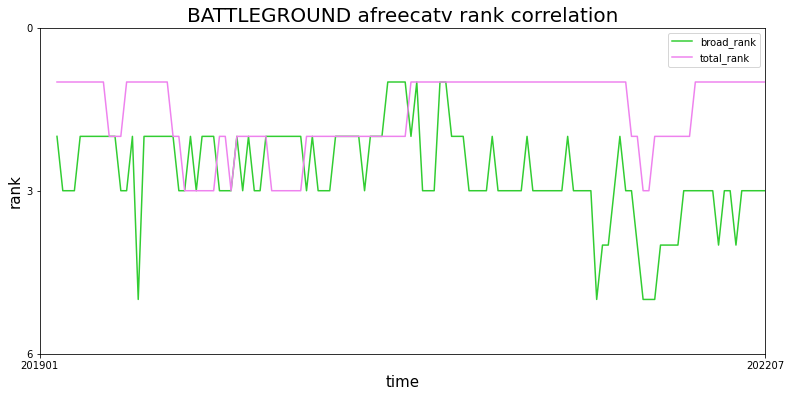

In [108]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
x1=dfa_bg['week_num']
y1=dfa_bg['broad_rank']
x2=dfpop_s_bg['week_num']
y2=dfpop_s_bg['rank']
plt.plot(x1,y1,color='limegreen', label='broad_rank') 
plt.plot(x2,y2,color='violet', label='total_rank' )
plt.title('BATTLEGROUND afreecatv rank correlation',size=20)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
plt.ylim(5,0)
plt.xlim(125,0)
ax.set_xticks([125,0],[201901,202207])
ax.set_yticks([6,3,0])

In [ ]:
# 그래프 상으로는 상관성이 없어 보인다.

In [73]:
# 배그의 아프리카 tv 방송 순위와 스팀 게임순위의 상관관계 검정
import scipy.stats as stats
corr_p=stats.pearsonr(dfa_bg['broad_rank'],dfpop_s_bg['rank'])
corr_p

(-0.07155537887582586, 0.4315783924361228)

In [ ]:
# 유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 크므로 가설을 기각할 수 없습니다.
# 따라서 배그의 스팀 순위와 아프리카tv 방송 점유율 순위는 상관이 있다고 할 수 없습니다.

In [100]:
# 스팀 게임 순위
dfpop_s = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/game_tree_graph/pretty_steam_graph.csv')
dfpop_s

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,week_num,rank,column-1 2,name,company,type
0,0,0,0,0,122,1,NaN,플레이어언노운스 배틀그라운드,PUBG Corporation,FPS
1,1,1,1,1,122,2,NaN,스타듀밸리,ConcernedApe,롤플레잉
2,2,2,2,2,122,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,3,3,3,122,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,4,4,4,122,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...,...,...,...
2455,2455,2455,2455,2455,0,16,(-1),DNF 듀얼,"NEOPLE Inc., NEXON Korea Corporation.",대전 액션
2456,2456,2456,2456,2456,0,17,(+1),더 심즈 4,Electronic Arts,시뮬레이션
2457,2457,2457,2457,2457,0,18,(+2),갓 오브 워,PlayStation PC LLC,액션 어드벤처
2458,2458,2458,2458,2458,0,19,(-3),레디오어낫,VOID Interactive,FPS


In [109]:
# 모바일 유저 수
dfu = pd.read_csv('C:/Users/HAIM/Documents/debbu/gameData/mobile_user/mobile_user_rank_30.csv')
dfu['week_num'] = 133 - dfu.index // 30
i = dfu[dfu['week_num']>122].index
dfu=dfu.drop(i)
dfu

,rank,rank_change,app_name,publisher_name,biz_category_sub,value,week_num
330,1,NaN,브롤스타즈,Supercell,액션게임,1.20,122
331,2,NaN,배틀그라운드,"KRAFTON, Inc.",슈팅게임,-0.96,122
332,3,NaN,피망 뉴맞고: 고스톱 대표 맞고 게임,NEOWIZ corp,카지노게임,-1.23,122
333,4,1.0,전략적 팀 전투: 리그 오브 레전드 전략 게임,"Riot Games, Inc",전략게임,23.63,122
334,5,1.0,ROBLOX,Roblox Corporation,어드벤처게임,7.28,122
...,...,...,...,...,...,...,...
4015,26,2.0,프로젝트 세카이 컬러풀 스테이지! feat.하츠네 미쿠,Nuverse,리듬/타일게임,18.92,0
4016,27,-2.0,리그 오브 레전드: 와일드 리프트,"Riot Games, Inc",전략게임,-1.29,0
4017,28,-2.0,꿈의 정원 (Gardenscapes),Playrix,캐주얼게임,0.40,0
4018,29,10.0,메이플스토리M,NEXON Company,롤플레잉게임,29.12,0


In [110]:
dfpop_s_bg=dfpop_s.loc[dfpop_s['name']=='플레이어언노운스 배틀그라운드']
dfu_bg=dfu.loc[dfu['app_name']=='배틀그라운드']

In [111]:
# 배그의 모바일 유저 수와 스팀 게임순위의 상관관계 검정
import scipy.stats as stats
corr_p=stats.pearsonr(dfpop_s_bg['rank'],dfu_bg['rank'])
corr_p

(-0.2526177101237188, 0.004818386317088101)

In [ ]:
# 유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 작으므로 가설을 기각합니다.
# 그러므로 음의 상관관계를 가질 수 있다고 할 수 있습니다.
# 따라서 배그의 스팀 순위와 모바일 수익값은 역관계가 있다고 할 수 있습니다.